# Распределение Парето

https://ru.wikipedia.org/wiki/Распределение_Парето

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Объявим функцию принимающую на вход массив и рисующую гистограмму

In [183]:
def show_plot_for_sample(sample, k):
    count, bins, _ = plt.hist(sample, 100, normed=True)

    fit = k / bins ** (k+1)

    plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
    
    plt.xlim(xmax=1.4, xmin=1.0)

    plt.show()

Сгенерируем выборку объёма 100:

In [184]:
k = 20.0
pareto = sts.pareto(k)
sample = pareto.rvs(1000)

Строим гистрограмму выборки и теоретическую плотность

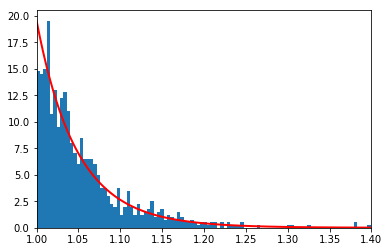

In [185]:
show_plot_for_sample(sample, k)

Рассчитаем дисперсию и математическое ожидание распределения Парето

In [190]:
DX = ((1 / (k - 1)) ** 2) * (k / (k - 2))
print('DX = {0}'.format(DX))
EX = k / (k - 1)
print('EX = {0}'.format(EX))

DX = 0.00307787011388
EX = 1.05263157895


In [191]:
def show_plot_for_sample_normal(sample):
    plt.hist(sample, 100, normed=True, label='pareto')
    
    DX_n = np.sqrt(DX/len(sample))
    
    xmin = np.min(sample)
    xmax = np.max(sample)
    
    x = np.linspace(xmin, xmax, 100)
    
    norm_rv = sts.norm(EX, DX_n)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
    
    plt.legend()

    plt.xlim(xmin=xmin, xmax=xmax)

    plt.show()

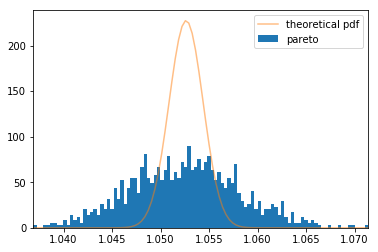

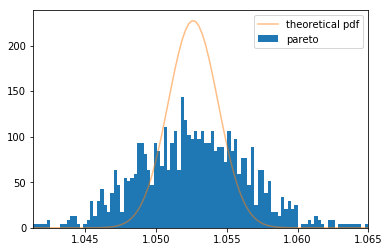

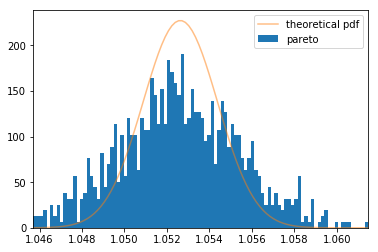

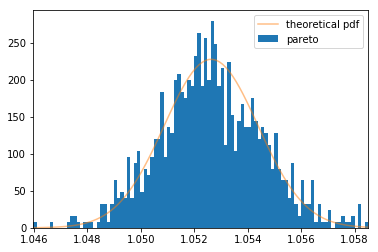

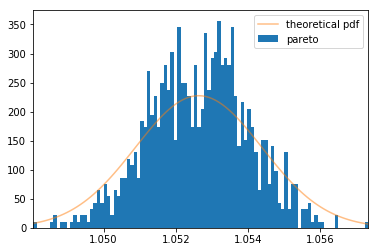

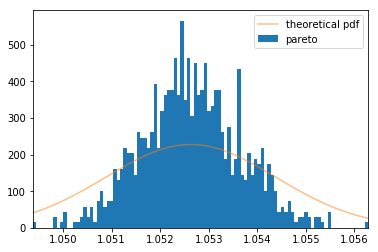

In [192]:
for j in range(6):
    n = 100 * 2 ** j
    avg_value = []
    for i in range(1000):
        avg = np.average(pareto.rvs(n))
        avg_value.append(avg)
    show_plot_for_sample_normal(avg_value)